In [22]:
import numpy as np
import matplotlib.pyplot as plt

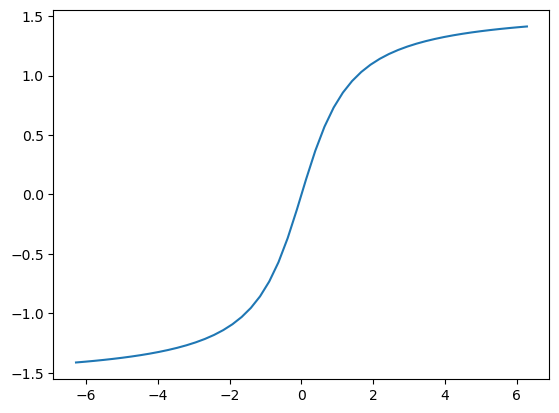

In [30]:
x = np.linspace(-2*np.pi, 2 * np.pi) 
y = np.arctan(x)
plt.plot(x, y)

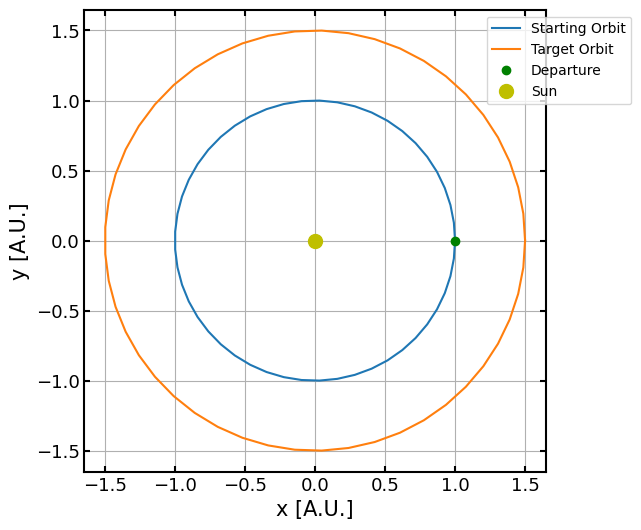

In [20]:


fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.set_aspect('equal', adjustable='box')

r_in = 1
r_out = 1.5 
theta = np.linspace(0, 2*np.pi)

ax.plot(r_in*np.cos(theta), r_in*np.sin(theta), label ="Starting Orbit")
ax.plot(r_out*np.cos(theta), r_out*np.sin(theta), label = "Target Orbit")
ax.plot(1, 0, 'go', label = "Departure")
ax.plot(0, 0, 'yo', markersize = 10, label = "Sun")
ax.legend(bbox_to_anchor=(1.2, 1))
ax.grid()
plt.xlabel("x [A.U.]", fontsize=15)
plt.ylabel("y [A.U.]", fontsize=15)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.tick_params(labelsize=13)
ax.tick_params(axis="both", direction="in", which="both", length=4, width = 1.5)
ax.tick_params(bottom=True, top=True, left=True, right=True)

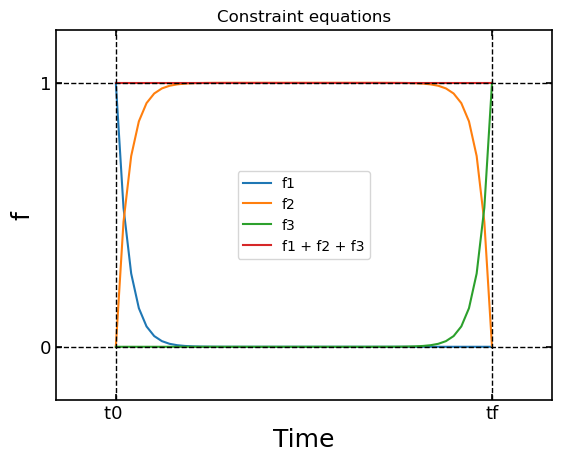

In [10]:
def f1(t, t0): 
    return np.exp(-a*(t-t0))

def f2(t, t0, tf): 
    return 1- np.exp(-a*(t-t0)) - np.exp(a*(t - tf))

def f3(t, tf):
    return np.exp(a*(t-tf))

def f0(t, t0): 
    return 1 - np.exp(-a*(t - t0))

t0 = 0
tf = 1*3.14
t  = np.linspace(t0, tf)
a  = 10

y1 = f1(t, t0) 
y2 = f2(t, t0, tf) 
y3 = f3(t, tf)
y0 = f0(t, t0)

total = y1 + y2 + y3 

fig, ax = plt.subplots(1, 1)
ax.set_title(f"Constraint equations")

#plt.plot(t, y0, label = 'f0')
plt.plot(t, y1, label = 'f1')
plt.plot(t, y2, label = 'f2')
plt.plot(t, y3, label = 'f3')
plt.plot(t, total, label = "f1 + f2 + f3")

plt.axhline(0, color = 'k', linewidth = 1, linestyle = '--')
plt.axhline(1, color = 'k', linewidth = 1, linestyle = '--')
plt.axvline(t0, color = 'k', linewidth = 1, linestyle = '--')
plt.axvline(tf, color = 'k', linewidth = 1, linestyle = '--')

plt.ylabel("f", fontsize = 18)
plt.xlabel("Time", fontsize = 18)

plt.ylim(-.2, 1.2)
plt.xlim(t0-0.5, tf+0.5)
ax.set_yticks([0, 1])
ax.set_xticks([t0, tf])
ax.set_xticklabels(['t0 ', 'tf'])

plt.legend()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)
ax.tick_params(labelsize=13)
ax.tick_params(axis="both", direction="in", which="both", length=4, width = 1.2)
ax.tick_params(bottom=True, top=True, left=True, right=True)

In [23]:
def get_normal_distribution(mean, std_dev):
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    x = np.linspace(times[0], times[-1], 1000)
    y = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mean)/std_dev)**2)
    return x, y

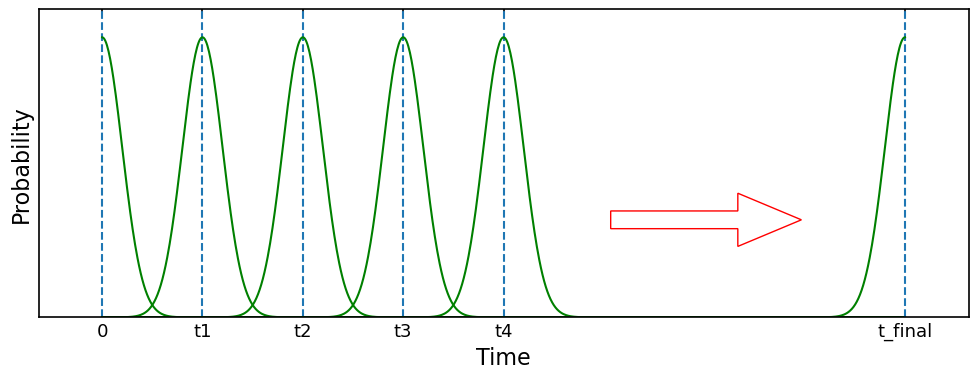

In [24]:
y_all = np.zeros(1000)
factor = 0.2
times = np.linspace(0, 2*np.pi, 200)[:5]
times = np.append(times, times[-1] + 4*(times[1] - times[0]))

fig, ax = plt.subplots(1, 1, figsize = (12, 4))

for i, time in enumerate(times): 
    ax.axvline(time, linestyle = '--')
    x, y = get_normal_distribution(time, factor*(times[1]-times[0])) 
    ax.plot(x, y, color = 'g')
    y_all += y
    
#ax.plot(x[x < times[-2]], y_all[x < times[-2]], color = 'r') 

ax.set_xlim(-0.02, times[-1] + 0.02) 
ax.set_xlabel("Time", fontsize = 16)
ax.set_ylim(0, 1.1*np.max(y)) 
ax.set_ylabel("Probability", fontsize = 16)
ax.set_xticks(times)
ax.set_xticklabels([0] + [f"t{i+1}" for i in range(len(times[:-2]))] + ["t_final"])
ax.set_yticks([])
ax.set_yticklabels([])

plt.arrow(x=0.16, y=22, dx=0.04, dy=0, width=4, facecolor='w', edgecolor='r', head_length = 0.02) 

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.2)
ax.tick_params(labelsize=13)
ax.tick_params(axis="both",direction="in",which="both", length=4, width = 1.2)
ax.tick_params(bottom=True, top=True, left=True, right=True)